
<h1>(The Sparks Foundation Task-1)<h1>
    
Prediction using supervised ML
    
Name:- Himanshu Choudhary
    
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

What will be predicted score if a student study for 9.25 hrs in a day?

In [4]:
# Importing all necessary libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [10]:
# check for missing values
data.isna().sum()


Hours     0
Scores    0
dtype: int64

In [11]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Text(0, 0.5, ' Percentage score')

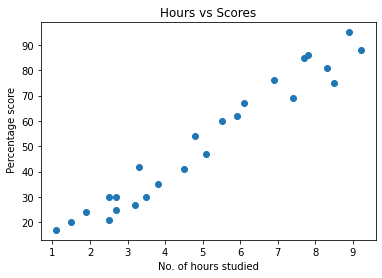

In [12]:

#Plotting data
x= data['Hours']
y= data['Scores']
plt.scatter(x,y)
plt.title("Hours vs Scores")
plt.xlabel("No. of hours studied")
plt.ylabel(" Percentage score")

In [13]:
corr= data.corr()
corr

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


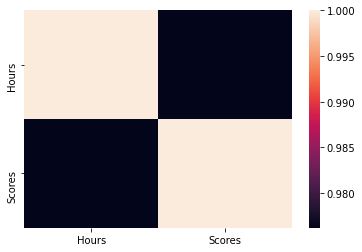

In [14]:
sns.heatmap(corr)

In [15]:
#Data preparation
x= data[["Hours"]].values
y= data[["Scores"]].values

In [16]:
X=data.iloc[:,:-1].values
y=data.iloc[:,1].values

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [18]:

#Training data by Linear Regression
from sklearn.linear_model import LinearRegression
training = LinearRegression()
training.fit(x_train, y_train)

LinearRegression()

In [21]:
x_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [20]:

y_train

array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
       54, 95, 41], dtype=int64)

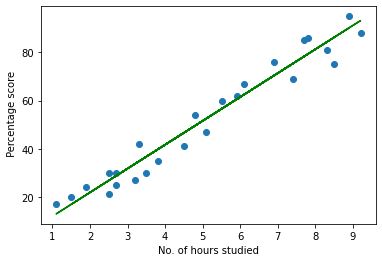

In [22]:
#Plotting the regression line
line= training.coef_*x+training.intercept_
plt.scatter(x,y)
plt.plot(x,line, c='green');
plt.xlabel("No. of hours studied")
plt.ylabel(" Percentage score")
plt.show()

In [23]:
#Printing train & test values
#Making predictions
print("Train")
print(training.score(x_train, y_train))
print("Test")
print(training.score(x_test, y_test))

Train
0.9515510725211552
Test
0.9454906892105356


In [24]:
y_pred = training.predict(x_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [25]:

#intercep 
print(training.intercept_)

2.018160041434683


In [26]:

#coefficient
print(training.coef_)

[9.91065648]


<h2>(What will be predicted score if a student study for 9.25 hrs in a day?)<h2>

In [31]:

hrs = 9.25
own_pred = training.predict([[hrs]])
print("No of Hours studied :", format(hrs))
print("Predicted score :",format(own_pred[0]))

No of Hours studied : 9.25
Predicted score : 93.69173248737538


In [32]:
# Finding error rate
from sklearn import metrics
print("MAE :",metrics.mean_absolute_error(y_test, y_pred))
print("MSE :",metrics.mean_squared_error(y_test, y_pred))
print("RMSE :",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE : 4.183859899002975
MSE : 21.5987693072174
RMSE : 4.6474476121003665
